# Matplotlib Intro

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Figures and Axes

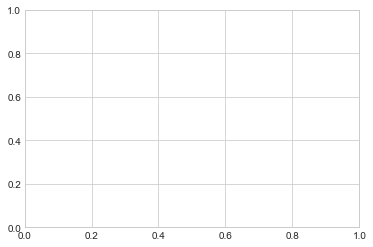

In [3]:
# subplots() returns a figure and axis

fig, ax = plt.subplots()   

### Line Plots

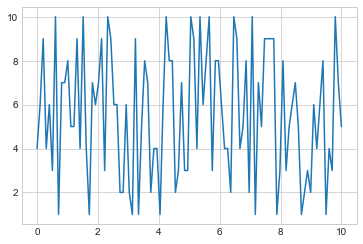

In [4]:
x = np.linspace(0, 10, 100)
y1 = np.random.randint(1, 11, 100)
y2 = np.random.randint(1, 11, 100)

fig, ax = plt.subplots()

ax.plot(x, y1)

plt.show()

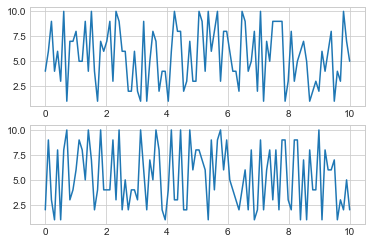

In [5]:
# render in separate axes;   subplots(n_rows, n_cols)

fig, axes = plt.subplots(2)

axes[0].plot(x, y1)
axes[1].plot(x, y2)

plt.show()

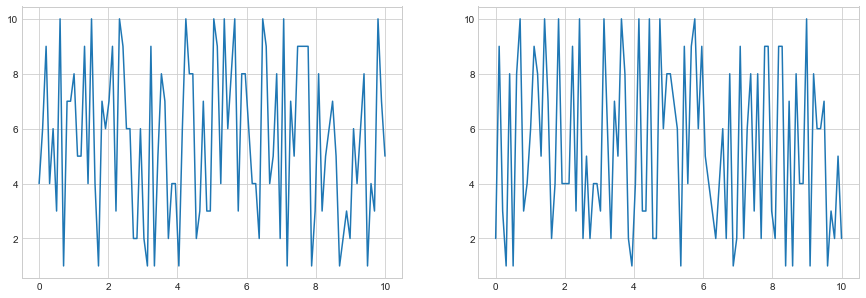

In [6]:
# set the size of the figure  (figsize=(w, h))
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].plot(x, y1)
axes[1].plot(x, y2)

plt.show()

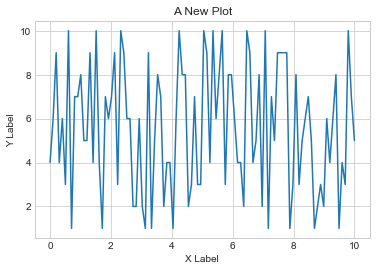

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y1)

# more flexible way of setting properties
ax.set_title("A New Plot")
ax.set_ylabel("Y Label")
ax.set_xlabel("X Label")

plt.show()

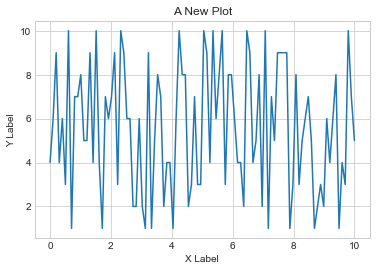

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y1)

# more convenient way of setting properties
ax.set(title="A New Plot", ylabel="Y Label", xlabel="X Label")

plt.show()

# Netflix Ratings Dataset

In [9]:
df = pd.read_csv("netflix_ratings.csv")
df.head()

,title,rating,release year,user rating score
0,White Chicks,PG-13,2004,82.0
1,Grey's Anatomy,TV-14,2016,98.0
2,Prison Break,TV-14,2008,98.0
3,How I Met Your Mother,TV-PG,2014,94.0
4,Supernatural,TV-14,2016,95.0


#### Explore some of the values within the dataset

In [10]:
df["rating"].unique()

array(['PG-13', 'TV-14', 'TV-PG', 'TV-MA', 'NR', 'TV-Y', 'TV-Y7-FV', 'PG',
       'R', 'TV-G', 'G', 'TV-Y7'], dtype=object)

### Separate the dataset by kid-friendly and mature movies/shows

In [11]:
PGup_ratings_df = df.loc[df["rating"].isin(['PG-13', 'TV-14', 'TV-PG', 'TV-MA', 'NR', 'PG', 'R'])]
G_ratings_df = df.loc[df["rating"].isin(['TV-Y', 'TV-Y7-FV', 'TV-G', 'G', 'TV-Y7'])]

## Histogram  (univariate)

### G Ratings

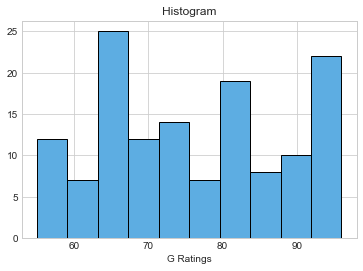

In [12]:
fig, ax = plt.subplots()
ax.hist(G_ratings_df['user rating score'], color = '#5DADE2', edgecolor='black')
ax.set(xlabel="G Ratings", title="Histogram")

plt.show()

### PG+ Ratings

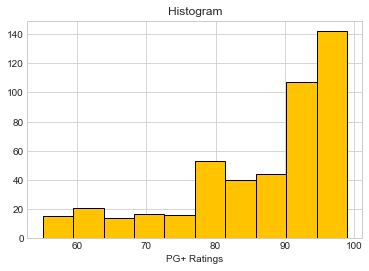

In [13]:
fig, ax = plt.subplots()


ax.hist(PGup_ratings_df['user rating score'], color = '#FFC300', edgecolor='black')
ax.set(xlabel="PG+ Ratings", title="Histogram")

"""
The basic built-in colors:
b: blue
g: green
r: red
c: cyan
m: magenta
y: yellow
k: black
w: white
"""

plt.show()

## Density Plot

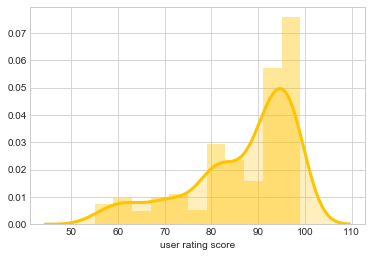

In [14]:
sns.distplot(PGup_ratings_df["user rating score"], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color = '#FFC300', 
                  label = "Kid Shows")
plt.show()

### User Rating Score by Show Rating, pre- and post-2000

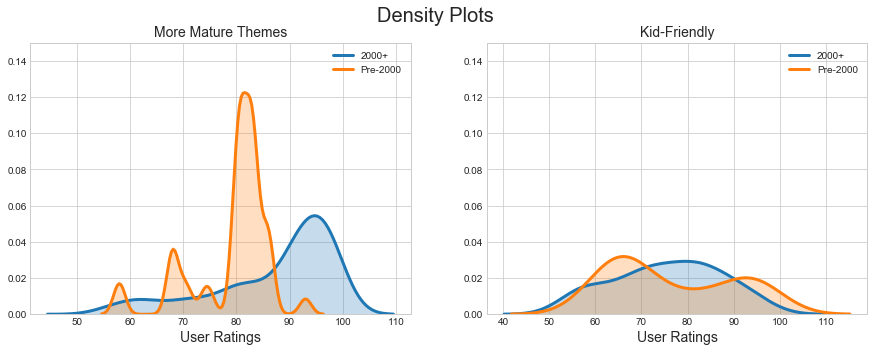

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.distplot(PGup_ratings_df.loc[PGup_ratings_df["release year"] >= 2000, "user rating score"], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "2000+", ax=ax[0])

sns.distplot(PGup_ratings_df.loc[PGup_ratings_df["release year"] < 2000, "user rating score"], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Pre-2000", ax=ax[0])

sns.distplot(G_ratings_df.loc[G_ratings_df["release year"] >= 2000, "user rating score"], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "2000+", ax=ax[1])

sns.distplot(G_ratings_df.loc[G_ratings_df["release year"] < 2000, "user rating score"], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Pre-2000", ax=ax[1])

####  Set some properties of the plots  ####
fig.suptitle('Density Plots', fontsize=20)
ax[0].set_xlabel("User Ratings", fontsize=14)
ax[1].set_xlabel("User Ratings", fontsize=14)
ax[0].set_title("More Mature Themes", fontsize=14)
ax[1].set_title("Kid-Friendly", fontsize=14)
ax[0].set_ylim((0, .15))
ax[1].set_ylim((0, .15))
plt.show()

### Display the top-10 scores by density

In [16]:
PGup_ratings_df.loc[:, 'user rating score'].value_counts(normalize=True).head(10)

98.0    0.098081
97.0    0.076759
91.0    0.070362
94.0    0.068230
96.0    0.061834
92.0    0.051173
95.0    0.049041
93.0    0.038380
81.0    0.038380
80.0    0.034115
Name: user rating score, dtype: float64

In [17]:
G_ratings_df.loc[:, 'user rating score'].value_counts(normalize=True).head(10)

95.0    0.073529
67.0    0.073529
81.0    0.066176
64.0    0.058824
74.0    0.051471
61.0    0.051471
88.0    0.051471
70.0    0.044118
57.0    0.044118
93.0    0.044118
Name: user rating score, dtype: float64

### Scatter Plot

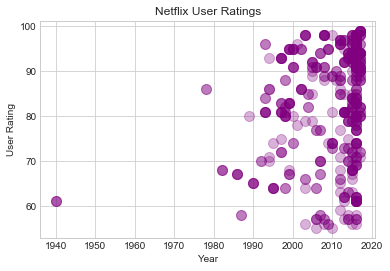

In [18]:
fig, ax = plt.subplots()

#ax.scatter(x, y, alpha, size, color)
ax.scatter(df['release year'], df['user rating score'], 
           alpha=.3, s = 100, c = "purple")

# Set properties
ax.set(title="Netflix User Ratings", xlabel='Year', ylabel="User Rating")

plt.show()

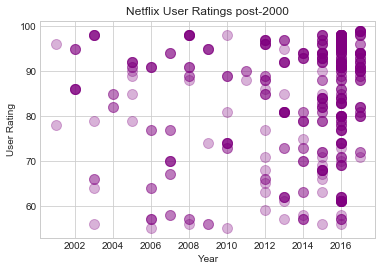

In [19]:
fig, ax = plt.subplots()

#ax.scatter(x, y, alpha, size, color)
ax.scatter(df.loc[df['release year']> 2000, 'release year'], df.loc[df['release year']> 2000, 'user rating score'], 
           alpha=.3, s = 100, c = "purple")

# Set properties
ax.set(title="Netflix User Ratings post-2000", xlabel='Year', ylabel="User Rating")

plt.show()

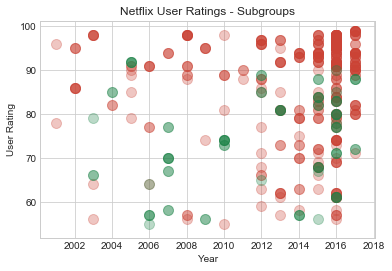

In [20]:
fig, ax = plt.subplots()

#ax.scatter(x, y, alpha, size, color)

# More mature shows
ax.scatter(PGup_ratings_df.loc[PGup_ratings_df['release year']> 2000, 'release year'], PGup_ratings_df.loc[PGup_ratings_df['release year']> 2000, 'user rating score'], 
           alpha=.3, s = 100, c = "#CB4335")
# Kid shows
ax.scatter(G_ratings_df.loc[G_ratings_df['release year']> 2000, 'release year'], G_ratings_df.loc[G_ratings_df['release year']> 2000, 'user rating score'], 
           alpha=.3, s = 100, c = "#1E8449")

# Set properties
ax.set(title="Netflix User Ratings - Subgroups", xlabel='Year', ylabel="User Rating")

plt.show()